In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

In [36]:
import random

# 设置随机数种子
seed_value = 20030321

# 设置 Python 的随机数种子
random.seed(seed_value)

# 设置 Numpy 的随机数种子
np.random.seed(seed_value)

# 设置 TensorFlow 的随机数种子
tf.random.set_seed(seed_value)

In [2]:
# 读入文件
train_data_df = pd.read_csv("../data/traindata.csv")
train_label_df = pd.read_csv("../data/trainlabel.txt")
features = train_data_df.columns

# 数值填充
train_data_df.replace('Preschool', 1, inplace=True)
train_data_df.replace('1st-4th', 2, inplace=True)
train_data_df.replace('5th-6th', 3, inplace=True)
train_data_df.replace('7th-8th', 4, inplace=True)
train_data_df.replace('9th', 5, inplace=True)
train_data_df.replace('10th', 6, inplace=True)
train_data_df.replace('11th', 7, inplace=True)
train_data_df.replace('12th', 8, inplace=True)
train_data_df.replace('HS-grad', 9, inplace=True)
train_data_df.replace('Some-college', 10, inplace=True)
train_data_df.replace('Assoc-voc', 11, inplace=True)
train_data_df.replace('Assoc-acdm', 12, inplace=True)
train_data_df.replace('Bachelors', 13, inplace=True)
train_data_df.replace('Prof-school', 14, inplace=True)
train_data_df.replace('Masters', 15, inplace=True)
train_data_df.replace('Doctorate', 16, inplace=True)

# 对非数值信息独热编码
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(train_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
encoded_features = pd.concat([pd.DataFrame(encoded_features), train_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
encoded_features

# 数据归一化
encoded_features.columns = encoded_features.columns.astype(str)

# 使用StandardScaler进行Z-Score归一化
zscore_scaler = StandardScaler()
df_zscore_scaled = zscore_scaler.fit_transform(encoded_features)

encoded_features = pd.DataFrame(df_zscore_scaled)

# 相关性分析
correlation_matrix = encoded_features.corr()

# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age','fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in encoded_features.columns: encoded_features = encoded_features.drop(i, axis=1)
                
encoded_features

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.175098,3.782449,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,2.821506,-0.114762,1.131681,0.38330,-0.214689,-2.148673
1,-0.175098,-0.264379,-0.014813,-1.515578,5.270463,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.108878,2.706469,1.131681,-0.14506,-0.214689,0.775212
2,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,-2.932691,-0.045458,-0.022952,-0.697579,1.440206,-0.416186,-0.14506,3.690793,0.775212
3,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.182192,-0.050070,-0.416186,-0.14506,-0.214689,-0.036978
4,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-1.210779,1.111395,-0.029219,-0.14506,-0.214689,-1.255264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.695392,-1.042350,-1.190120,-0.14506,-0.214689,0.775212
22788,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.917522,-0.674011,-0.416186,-0.14506,-0.214689,-0.036978
22789,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.184379,1.060678,-0.416186,-0.14506,-0.214689,-0.036978
22790,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,2.518958,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.404322,1.382914,-0.029219,-0.14506,-0.214689,-0.036978


In [3]:
from sklearn.model_selection import cross_val_score

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(encoded_features, train_label_df, test_size=0.2, random_state=6)
y_train = y_train['label'].values.ravel()
y_test = y_test['label'].values.ravel()

train_label_df = train_label_df['label'].values.ravel()

def evaluate(model):

    # 执行交叉验证
    scores = cross_val_score(model, encoded_features, train_label_df, cv=5)  # cv=5 表示将数据集划分为5个折叠

    # 打印每次交叉验证的得分
    print("Cross-validation scores:", scores)

    # 打印平均得分
    print("Average score:", scores.mean())

In [4]:
# 创建神经网络模型
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(X_test.columns),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/10
570/570 [==============================] - 0s 574us/step - loss: 0.3620 - accuracy: 0.8299 - val_loss: 0.3429 - val_accuracy: 0.8460
Epoch 2/10
570/570 [==============================] - 0s 457us/step - loss: 0.3173 - accuracy: 0.8524 - val_loss: 0.3432 - val_accuracy: 0.8480
Epoch 3/10
570/570 [==============================] - 0s 482us/step - loss: 0.3092 - accuracy: 0.8564 - val_loss: 0.3338 - val_accuracy: 0.8495
Epoch 4/10
570/570 [==============================] - 0s 456us/step - loss: 0.3017 - accuracy: 0.8584 - val_loss: 0.3336 - val_accuracy: 0.8480
Epoch 5/10
570/570 [==============================] - 0s 456us/step - loss: 0.2975 - accuracy: 0.8621 - val_loss: 0.3332 - val_accuracy: 0.8537
Epoch 6/10
570/570 [==============================] - 0s 444us/step - loss: 0.2941 - accuracy: 0.8642 - val_loss: 0.3315 - val_accuracy: 0.8528
Epoch 7/10
570/570 [==============================] - 0s 446us/step - loss: 0.2904 - accuracy: 0.8634 - val_loss: 0.3330 - val_accuracy:

In [6]:
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop

In [7]:
# 创建神经网络模型
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(X_test.columns),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# 编译模型
model.compile(optimizer=SGD(learning_rate=0.3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/10
570/570 [==============================] - 0s 462us/step - loss: 0.3571 - accuracy: 0.8360 - val_loss: 0.3433 - val_accuracy: 0.8419
Epoch 2/10
570/570 [==============================] - 0s 368us/step - loss: 0.3221 - accuracy: 0.8501 - val_loss: 0.3374 - val_accuracy: 0.8471
Epoch 3/10
570/570 [==============================] - 0s 364us/step - loss: 0.3114 - accuracy: 0.8535 - val_loss: 0.3349 - val_accuracy: 0.8482
Epoch 4/10
570/570 [==============================] - 0s 371us/step - loss: 0.3070 - accuracy: 0.8553 - val_loss: 0.3422 - val_accuracy: 0.8491
Epoch 5/10
570/570 [==============================] - 0s 370us/step - loss: 0.3024 - accuracy: 0.8582 - val_loss: 0.3376 - val_accuracy: 0.8548
Epoch 6/10
570/570 [==============================] - 0s 371us/step - loss: 0.2999 - accuracy: 0.8589 - val_loss: 0.3313 - val_accuracy: 0.8537
Epoch 7/10
570/570 [==============================] - 0s 374us/step - loss: 0.2964 - accuracy: 0.8618 - val_loss: 0.3299 - val_accuracy:

In [8]:
# 创建神经网络模型
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(X_test.columns),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# 编译模型
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/10
570/570 [==============================] - 0s 637us/step - loss: 0.3578 - accuracy: 0.8360 - val_loss: 0.3403 - val_accuracy: 0.8471
Epoch 2/10
570/570 [==============================] - 0s 549us/step - loss: 0.3194 - accuracy: 0.8522 - val_loss: 0.3403 - val_accuracy: 0.8467
Epoch 3/10
570/570 [==============================] - 0s 411us/step - loss: 0.3119 - accuracy: 0.8558 - val_loss: 0.3342 - val_accuracy: 0.8550
Epoch 4/10
570/570 [==============================] - 0s 417us/step - loss: 0.3073 - accuracy: 0.8576 - val_loss: 0.3365 - val_accuracy: 0.8504
Epoch 5/10
570/570 [==============================] - 0s 414us/step - loss: 0.3039 - accuracy: 0.8609 - val_loss: 0.3286 - val_accuracy: 0.8530
Epoch 6/10
570/570 [==============================] - 0s 415us/step - loss: 0.3017 - accuracy: 0.8622 - val_loss: 0.3317 - val_accuracy: 0.8568
Epoch 7/10
570/570 [==============================] - 0s 417us/step - loss: 0.2986 - accuracy: 0.8626 - val_loss: 0.3409 - val_accuracy:

In [9]:
# 创建神经网络模型
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(X_test.columns),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 定义自适应衰减回调函数
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

# 训练模型并应用自适应衰减
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_callback])

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/10
570/570 [==============================] - 0s 624us/step - loss: 0.3556 - accuracy: 0.8354 - val_loss: 0.3403 - val_accuracy: 0.8451 - lr: 0.0010
Epoch 2/10
570/570 [==============================] - 0s 473us/step - loss: 0.3172 - accuracy: 0.8544 - val_loss: 0.3375 - val_accuracy: 0.8489 - lr: 0.0010
Epoch 3/10
570/570 [==============================] - 0s 468us/step - loss: 0.3077 - accuracy: 0.8574 - val_loss: 0.3381 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 4/10
570/570 [==============================] - 0s 461us/step - loss: 0.3026 - accuracy: 0.8609 - val_loss: 0.3370 - val_accuracy: 0.8511 - lr: 0.0010
Epoch 5/10
570/570 [==============================] - 0s 461us/step - loss: 0.2983 - accuracy: 0.8607 - val_loss: 0.3408 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 6/10
570/570 [==============================] - 0s 452us/step - loss: 0.2934 - accuracy: 0.8622 - val_loss: 0.3330 - val_accuracy: 0.8530 - lr: 0.0010
Epoch 7/10
570/570 [==============================] - 0s 4

Epoch 1/30
285/285 [==============================] - 1s 2ms/step - loss: 1.6699 - accuracy: 0.7753 - val_loss: 0.7781 - val_accuracy: 0.8357 - lr: 0.0010
Epoch 2/30
285/285 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.8377 - val_loss: 0.5055 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 3/30
285/285 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8440 - val_loss: 0.4334 - val_accuracy: 0.8460 - lr: 0.0010
Epoch 4/30
285/285 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8480 - val_loss: 0.4004 - val_accuracy: 0.8462 - lr: 0.0010
Epoch 5/30
285/285 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8508 - val_loss: 0.3861 - val_accuracy: 0.8497 - lr: 0.0010
Epoch 6/30
285/285 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8500 - val_loss: 0.3799 - val_accuracy: 0.8502 - lr: 0.0010
Epoch 7/30
285/285 [==============================] - 0s 2ms/step - lo

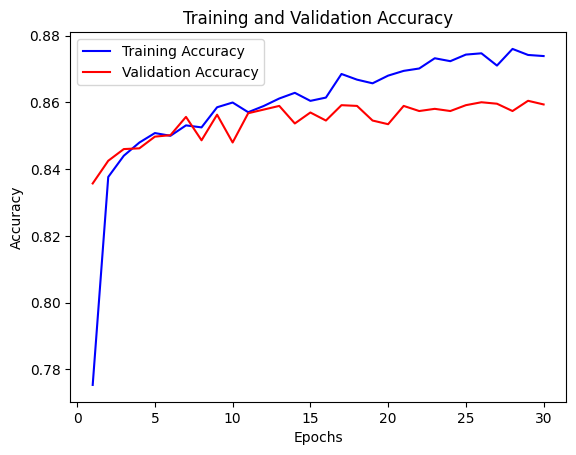

In [57]:
# 创建神经网络模型
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(len(X_test.columns),)),
    keras.layers.Dense(96, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),  # 添加Dropout层，丢弃50%的神经元
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(2, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 定义自适应衰减回调函数
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# 训练模型并应用自适应衰减
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_callback])

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 获取每个epoch的准确率
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 绘制折线图
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
285/285 [==============================] - 1s 2ms/step - loss: 1.7232 - accuracy: 0.7498 - val_loss: 0.7980 - val_accuracy: 0.7589
Epoch 2/30
285/285 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.8310 - val_loss: 0.5311 - val_accuracy: 0.8447
Epoch 3/30
285/285 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8422 - val_loss: 0.4481 - val_accuracy: 0.8469
Epoch 4/30
285/285 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8460 - val_loss: 0.4088 - val_accuracy: 0.8478
Epoch 5/30
285/285 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8496 - val_loss: 0.4023 - val_accuracy: 0.8361
Epoch 6/30
285/285 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.8493 - val_loss: 0.3881 - val_accuracy: 0.8469
Epoch 7/30
285/285 [==============================] - 1s 2ms/step - loss: 0.3796 - accuracy: 0.8497 - val_loss: 0.3873 - val_accuracy: 0.8513
Epoch 

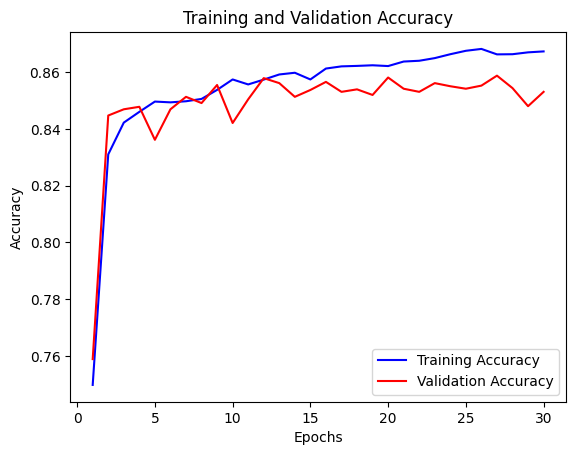

In [58]:
# 创建神经网络模型
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(len(X_test.columns),)),
    keras.layers.Dense(96, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),  # 添加Dropout层，丢弃50%的神经元
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(2, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型并应用自适应衰减
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 获取每个epoch的准确率
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 绘制折线图
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
# 预测
# 读入文件
test_data_df = pd.read_csv("../data/testdata.csv")
test_data_df.at[9360, 'native.country'] = '?'
features = test_data_df.columns

# 数值填充
test_data_df.replace('Preschool', 1, inplace=True)
test_data_df.replace('1st-4th', 2, inplace=True)
test_data_df.replace('5th-6th', 3, inplace=True)
test_data_df.replace('7th-8th', 4, inplace=True)
test_data_df.replace('9th', 5, inplace=True)
test_data_df.replace('10th', 6, inplace=True)
test_data_df.replace('11th', 7, inplace=True)
test_data_df.replace('12th', 8, inplace=True)
test_data_df.replace('HS-grad', 9, inplace=True)
test_data_df.replace('Some-college', 10, inplace=True)
test_data_df.replace('Assoc-voc', 11, inplace=True)
test_data_df.replace('Assoc-acdm', 12, inplace=True)
test_data_df.replace('Bachelors', 13, inplace=True)
test_data_df.replace('Prof-school', 14, inplace=True)
test_data_df.replace('Masters', 15, inplace=True)
test_data_df.replace('Doctorate', 16, inplace=True)

# 对非数值信息独热编码
encoder = OneHotEncoder()
X_pred = encoder.fit_transform(test_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
X_pred = pd.concat([pd.DataFrame(X_pred), test_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
X_pred

# 数据归一化
X_pred.columns = X_pred.columns.astype(str)

# 使用StandardScaler进行Z-Score归一化
zscore_scaler = StandardScaler()
df_zscore_scaled = zscore_scaler.fit_transform(X_pred)

X_pred = pd.DataFrame(df_zscore_scaled)

# 相关性分析
correlation_matrix = X_pred.corr()

# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in X_pred.columns: X_pred = X_pred.drop(i, axis=1)
                
X_pred

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,2.365352,-0.304488,-0.036433,0.234750,-0.221203,1.577408
1,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.347320,0.344807,1.927770,-0.148041,-0.221203,1.175093
2,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,-2.933548,-0.045293,-0.020239,-0.200689,1.148321,-0.429274,-0.148041,-0.221203,-0.031851
3,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.493951,0.375968,1.142089,-0.148041,-0.221203,0.370464
4,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-1.373736,0.213488,-0.036433,-0.148041,-0.221203,-1.962962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.787212,-0.782908,1.142089,-0.148041,-0.221203,-0.434166
9765,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.567266,0.338517,-0.429274,-0.148041,-0.221203,-0.031851
9766,5.800159,-0.256716,-0.01431,-1.519632,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.200689,-0.052032,1.142089,-0.148041,-0.221203,-0.031851
9767,-0.172409,-0.256716,-0.01431,-1.519632,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-1.373736,-0.249955,-0.429274,-0.148041,-0.221203,-1.641110


In [60]:
y_pred = model.predict(X_pred)
y_pred = np.argmax(y_pred, axis=1)
y_pred

306/306 [==============================] - 0s 465us/step


array([0, 1, 0, ..., 1, 0, 0])

In [61]:
# 指定要写入的文件路径和文件名
output_file = "../data/NN_label.txt"

# 打开文件并写入预测结果
with open(output_file, "w") as file:
    for prediction in y_pred:
        file.write(str(prediction) + "\n")

print("预测结果已写入文件:", output_file)

预测结果已写入文件: ../data/NN_label.txt
